# Digital For Industrial Summative - Part 1
 
## Creating A Digital Thread


A Digital Thread is the one unifying theme or characteristic that connects every aspect of an asset or unit, right from its inception and design, to manufacture, deployment, operations, maintenance to eventual retirement.

In analysis, a digital thread is the logical with which we bind and merge the various data sources into one whole, so that it lends itself to quantitative approaches easily.

<img src = 'images/Digital_Thread.JPG' width=500>


A digital thread is a technique to 'stitch' the data that comes in disjoint tables, such that they can be put together logically. That is a task for this exercise.

Data sets provided:

We have been give 5 data sets, all of which related to one month's worth of readings taken at a live volcano site. The volcano was instrumented with multiple sensors in 10 different geographical points (nodes). Our goal is to combine and merge all of this into one digital thread, making it amenable for analysis.

Tasks:

    1.0 Read all the needed input files
    2.0 Plotting Sensor Time Series
    3.0 Descriptive Analysis One data frame at a time 
    4.0 Creating a Digital Thread from the data sets
    5.0 Time Series based analysis
    6.0 Correlations Analysis
    7.0 Data Manipulations to Merge multiple data sets
    8.0 Building A Battery Remaining-Life prediction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
%matplotlib inline

### 1.0 Read all the needed input files

Create multiple data frames, one to hold each data table.

Convert all Data frame time stamps into date-time format, so that time-based indexing is possible

In [3]:
#create multiple data frames
data_point = pd.read_csv("data/datapoints.csv", parse_dates =["timestamp"])
data_types = pd.read_csv("data/datatypes.csv")
data_nodes= pd.read_csv("data/nodes.csv", parse_dates =["created_at", "updated_at"])
data_sensors = pd.read_csv("data/sensors.csv", parse_dates =["created_at", "updated_at"])
data_volcanos = pd.read_csv("data/volcanos.csv", parse_dates =["created_at", "updated_at"])

In [4]:
#view first five rows
data_point.head()

,id,value,timestamp,sensor_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.000,2016-08-03 04:39:25+00:00,7635c920-8679-11e6-a353-2f6c041e2491
1,764c5e61-8679-11e6-a353-2f6c041e2491,33.198,2016-08-03 04:39:25+00:00,763b9580-8679-11e6-a353-2f6c041e2491
2,764dbdf0-8679-11e6-a353-2f6c041e2491,29.300,2016-08-03 04:39:25+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491
3,764dbdf1-8679-11e6-a353-2f6c041e2491,96893.110,2016-08-03 04:39:25+00:00,763d9150-8679-11e6-a353-2f6c041e2491
4,764dbdf2-8679-11e6-a353-2f6c041e2491,459.736,2016-08-03 04:39:25+00:00,763701a1-8679-11e6-a353-2f6c041e2491


In [5]:
#view first five rows
data_types.head()

,id,type,si_unit,type_id
0,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
1,35dcb3c1-8679-11e6-bda3-ef77801087ee,pressure,pascal,PA
2,35dcb3c2-8679-11e6-bda3-ef77801087ee,humidity,relative humidity,HUMA
3,35dcdad0-8679-11e6-bda3-ef77801087ee,carbon dioxide concentration,ppm,GP_CO2
4,35dcdad1-8679-11e6-bda3-ef77801087ee,hydrogen sulfide concentration,ppm,GP_H2S


In [6]:
#view first five rows
data_nodes.head()

,id,name,description,location,status,created_at,updated_at,volcano_id
0,c5e39fa0-867a-11e6-a353-2f6c041e2491,N1,\N,\N,OFFLINE,2016-08-17 01:06:49+00:00,2016-09-29 19:28:05.932000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
1,c147ece0-8679-11e6-a353-2f6c041e2491,N9,\N,\N,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.065000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
2,76309900-8679-11e6-a353-2f6c041e2491,N8,\N,\N,OFFLINE,2016-08-03 22:09:40+00:00,2016-09-29 19:20:17.417000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
3,762b8ff0-8679-11e6-a353-2f6c041e2491,N10,\N,\N,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 19:20:17.431000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee
4,c14ccee0-8679-11e6-a353-2f6c041e2491,N2,\N,\N,OFFLINE,2016-08-10 04:20:22+00:00,2016-09-29 19:20:17.523000+00:00,35dc3e90-8679-11e6-bda3-ef77801087ee


In [7]:
#view first five rows
data_sensors.head()

,id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 19:41:07.066000+00:00,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491
1,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.793000+00:00,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
2,763b9580-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.797000+00:00,35dcdad1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
3,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.803000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
4,763d9150-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.811000+00:00,35dcb3c1-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491


In [8]:
#view first five rows
data_volcanos.head()

,id,name,description,location,status,created_at,updated_at
0,35dc3e90-8679-11e6-bda3-ef77801087ee,Masaya,"This is the world's biggest, baddest, most evi...","{11.985318299999999,-86.178342900000004}",OFFLINE,2016-09-29 19:16:23.419000+00:00,2016-10-07 07:43:05.015000+00:00


In [9]:
#check timestamp datatype
print(data_point['timestamp'].dtypes)
print(data_sensors['created_at'].dtypes)
print(data_sensors['updated_at'].dtypes)

datetime64[ns, UTC]
datetime64[ns, UTC]
datetime64[ns, UTC]


### 2. Plotting Sensor Time Series

Create separate plots for each sensor in the dataset. Show each one in a separate subplot.

**What (if anything) can we tell about the various sensors from the plots?**


In [ ]:
df_point = pd.DataFrame(data_point)
df_group = df_point.groupby(['sensor_id']).sum()
df_group

In [ ]:
plt.plot(df_group['sensor_id'], df_group['value'])
plt.title('')
plt.xlabel('Sensor Id')
plt.ylabel('Sensor value')
plt.show()

### 3.0 Descriptive Analysis One data frame at a time



You have two data frames: `sensors` and `types` Merge each sensor_id with its type. (Hint: Use `pd.merge()`)



In [10]:
#merge each sensor_id with its type.
df_types = pd.DataFrame(data_types)
df_sensors = pd.DataFrame(data_sensors)

sensors_type = df_types.merge(df_sensors, left_on='id', right_on='data_type_id')  
sensors_type.head()

,id_x,type,si_unit,type_id,id_y,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
0,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.803000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491
1,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,c15a6371-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40+00:00,2016-09-29 20:13:52.836000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491
2,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,7644bd40-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 22:09:40+00:00,2016-09-29 19:20:17.417000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,76309900-8679-11e6-a353-2f6c041e2491
3,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22+00:00,2016-09-29 19:20:17.516000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491
4,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,763bbc90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32+00:00,2016-09-30 18:12:04.578000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491


3.1 Question: What does this achieve? Why should we do this?

3.2: How many sensors of each type are there?

In [36]:
#group by type then count to show number of sensors by type
sensors = sensors_type.groupby(['type']).count()
sensors

,id_x,si_unit,type_id,id_y,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
type,,,,,,,,,,,
RSAM,1,1,1,1,1,1,1,1,1,1,1
battery,10,10,10,10,10,10,10,10,10,10,10
carbon dioxide concentration,10,10,10,10,10,10,10,10,10,10,10
humidity,10,10,10,10,10,10,10,10,10,10,10
hydrogen sulfide concentration,10,10,10,10,10,10,10,10,10,10,10
pressure,10,10,10,10,10,10,10,10,10,10,10
temperature,10,10,10,10,10,10,10,10,10,10,10


----

### 4.0 Creating a Digital Thread from the data sets**

**Goal: Merge everything into one wide data table ** 

Take the raw `datapoints` data frame and merge it with all the `sensors` and their types.

In [12]:
#merge everything
df_point = pd.DataFrame(data_point)
   
data_all = df_types.merge(df_sensors, left_on='id', right_on='data_type_id').merge(df_point, left_on='id_y', right_on='sensor_id')
data_all.head()

,id_x,type,si_unit,type_id,id_y,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,id,value,timestamp,sensor_id
0,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.803000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,764dbdf0-8679-11e6-a353-2f6c041e2491,29.30,2016-08-03 04:39:25+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491
1,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.803000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,76514060-8679-11e6-a353-2f6c041e2491,29.94,2016-08-03 04:47:41+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491
2,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.803000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,76584540-8679-11e6-a353-2f6c041e2491,28.61,2016-08-03 05:08:52+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491
3,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.803000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,765dea91-8679-11e6-a353-2f6c041e2491,28.24,2016-08-03 05:14:08+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491
4,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,763ca6f0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25+00:00,2016-09-29 20:13:52.803000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,7661bb20-8679-11e6-a353-2f6c041e2491,28.57,2016-08-03 05:28:55+00:00,763ca6f0-8679-11e6-a353-2f6c041e2491


-----

### 5.0 Time Series based analysis

Now, we are going to take this stitched data frame and use it for our analysis. Specifically, we are going to perform Time-based analysis on this data.

     Note: If by this point the time stamp is not in datetime format, make sure it is in datetime format.
    Step 1: Resample the dataset to the daily level. (One observation per date)
    Step 2: For the resampled data, calculate the daily mean, min and max values for each sensor id.

Resample to get daily averages.
Then subset to select the columns you need.

Present the data in a summary similar to the example presented below:


![title](example-1.png)

In [13]:
#resample data_set to daily and calculate the daily mean, min and max values for each sensor id
data_all1 = data_all.set_index('timestamp')
daily = data_all1.groupby(["sensor_id", "type"]).resample('D').agg({'value': ['mean', 'min', 'max']})
daily

value  \
                                                                               mean   
sensor_id                            type     timestamp                               
1248ff60-e707-11e6-89c8-314aa4f67f8c RSAM     2016-07-01 00:00:00+00:00  306.902098   
                                              2016-07-02 00:00:00+00:00  267.804196   
                                              2016-07-03 00:00:00+00:00  286.972028   
                                              2016-07-04 00:00:00+00:00  339.860140   
                                              2016-07-05 00:00:00+00:00  445.828571   
...                                                                             ...   
e6691530-8679-11e6-a353-2f6c041e2491 humidity 2016-09-03 00:00:00+00:00         NaN   
                                              2016-09-04 00:00:00+00:00         NaN   
                                              2016-09-05 00:00:00+00:00         NaN   
                                              2016-09-06 00:00:00+00:00         NaN   
                                              2016-09-07 00:00:00+00:00         NaN   

                                                                                \
                                                                           min   
sensor_id                            type     timestamp                          
1248ff60-e707-11e6-89c8-314aa4f67f8c RSAM     2016-07-01 00:00:00+00:00   81.0   
                                              2016-07-02 00:00:00+00:00  113.0   
                                              2016-07-03 00:00:00+00:00  109.0   
                                              2016-07-04 00:00:00+00:00   89.0   
                                              2016-07-05 00:00:00+00:00  124.0   
...                                                                        ...   
e6691530-8679-11e6-a353-2f6c041e2491 humidity 2016-09-03 00:00:00+00:00    NaN   
                                              2016-09-04 00:00:00+00:00    NaN   
                                              2016-09-05 00:00:00+00:00    NaN   
                                              2016-09-06 00:00:00+00:00    NaN   
                                              2016-09-07 00:00:00+00:00    NaN   

                                                                                
                                                                           max  
sensor_id                            type     timestamp                         
1248ff60-e707-11e6-89c8-314aa4f67f8c RSAM     2016-07-01 00:00:00+00:00  683.0  
                                              2016-07-02 00:00:00+00:00  558.0  
                                              2016-07-03 00:00:00+00:00  513.0  
                                              2016-07-04 00:00:00+00:00  637.0  
                                              2016-07-05 00:00:00+00:00  612.0  
...                                                                        ...  
e6691530-8679-11e6-a353-2f6c041e2491 humidity 2016-09-03 00:00:00+00:00    NaN  
                                              2016-09-04 00:00:00+00:00    NaN  
                                              2016-09-05 00:00:00+00:00    NaN  
                                              2016-09-06 00:00:00+00:00    NaN  
                                              2016-09-07 00:00:00+00:00    NaN  

[2234 rows x 3 columns]

### 6.0 Correlations Analysis

The next task is to perform a correlation analysis. 

1.  Goal: We want to find all the sensors that are strongly correlated to each other.
2. One of the reasons for doing this is that if two (or more) sensors are very highly correlated, we only need to keep one out of each correlated set. (This reduces the problem size and also takes care of colinearlity-related unstability in certain calculations.)

The Correlation heatmap that we are looking for should be along the following lines:


<img src = "images/example-2.png" width=450 height=200>

First, look for correlations visually. 

**Subtask: Plot all the sensors values (of one type) over time.**

Sub task: Identify all the temperature sensors in the data set. Hint: These are the ones that have the string 'TCA' in their type id's

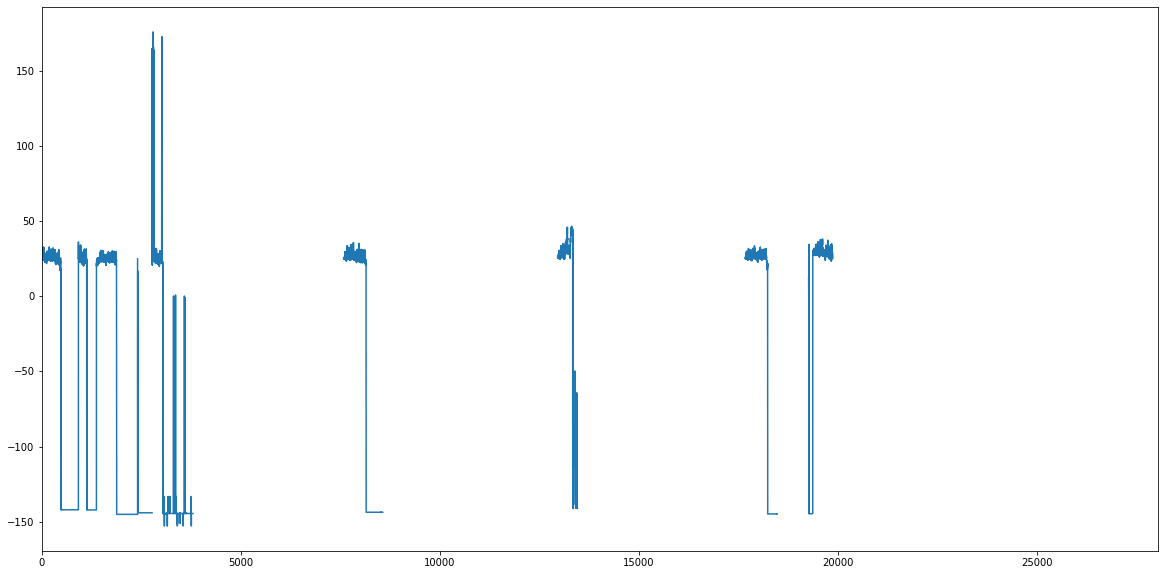

In [14]:
#group by temp sensors then plot them on one single plot
temp_sensors = data_all.type_id == 'TCA'
plt.figure(figsize=(20,10))
data_all[temp_sensors]['value'].plot()

In [ ]:
# s2 = full
temp_sensors1 = [i for i in data_all[data_all.type_id == 'TCA']['id_x']]
# temp_sensors = [s for s in s2[s2.type_id =='TCA']['id_x']]
# temperature_sensors = [s for t,s in zip(s2['type_id'], s2['id_x']) if t=='TCA'] # alternative way

** Using Pandas to plot all the temperature sensors on one single plot. **

- Use pandas to loop over each temperature sensor, and plot them one at a time.
- Hint: Group by sensor_ids and hence plot each group per time.

In [ ]:
plt.figure(figsize=(20,5))

for i in temp_sensors1:
    #print(s)
    sub_df = data_all[data_all['sensor_id']==i]
    plt.plot(sub_df.index, sub_df['value'], '.')

In [ ]:
# plt.figure(figsize=(20, 8))

# for index, group in enumerate(temp_groups):
#     sensor_id, sensor_df = group
#     plt.plot(sensor_df.index, sensor_df["value"], ".")
plt.figure(figsize=(20,5))

for s in temp_sensors:
    #print(s)
    sub_df = full[full['sensor_id']==s]
    plt.plot(sub_df.index, sub_df['value'], '.')

**Task: Creating Subplots - Each temperature sensor gets its own panel**

Question: Based on the plots being made, comment on the readings made by the temperature sensors.

**Task: Clean Up Sensor Data**

In [15]:
data_all.isnull().sum()*(100/(len(data_point)))

id_x               0.000000
type               0.000000
si_unit            0.000000
type_id            0.000000
id_y               0.000000
description        0.000000
data_frequency     0.000000
status             0.000000
created_at         0.000000
updated_at         0.000000
data_type_id       0.000000
node_id            0.000000
id                 0.000000
value             64.054516
timestamp          0.000000
sensor_id          0.000000
dtype: float64

In [18]:
data_all_clean = data_all.dropna()
data_all_clean.isnull().sum()*(100/(len(data_all_clean)))

id_x              0.0
type              0.0
si_unit           0.0
type_id           0.0
id_y              0.0
description       0.0
data_frequency    0.0
status            0.0
created_at        0.0
updated_at        0.0
data_type_id      0.0
node_id           0.0
id                0.0
value             0.0
timestamp         0.0
sensor_id         0.0
dtype: float64

Although 64% of value data was missing I still droped the missing data. Reason being this is data that was being collected every minute and the remaining data is enough to provide us with insights that will be a representation of the whole data.

## Task: Creating a reshaped Data Frame of Temperature sensors

For this, we are going to have each column be 1 sensor... from 1 to 10. The rows will be timestamps, as before.

Hint: pd.pivot() is perfect for this task.

In [83]:
#group by temp sensors
temp_sensors_clean = data_all_clean[data_all_clean.type_id == 'TCA']

#reshape the data to have each column as 1 sensor and rows as timestamps
temp_sensors_data = temp_sensors_clean.pivot(columns='sensor_id', values='timestamp')
temp_sensors_data

sensor_id,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,7644bd40-8679-11e6-a353-2f6c041e2491,c15a6371-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,c5e881a1-867a-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3d53930-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491
0,NaT,2016-08-03 04:39:25,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,NaT,2016-08-03 04:47:41,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,NaT,2016-08-03 05:08:52,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,NaT,2016-08-03 05:14:08,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,NaT,2016-08-03 05:28:55,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...
19869,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-08-25 21:32:19
19870,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-08-25 22:32:17
19871,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-08-26 00:02:14
19872,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2016-08-26 01:02:12


Since this is a real sensor data set, there are some time stamps and sensor_id's that are repeating. (Unfortunately, this happens often in real data sets.)

**Task: Find all rows with the same [Timestamp, Sensor_id] and delete them **

**Here's a clever way to find out all the duplicated rows.**

Some Timestamp and sensor_id are repeating. That causes Indexing problems.

In [93]:
#show duplicated rows
pd.concat(g for _, g in temp_sensors_clean.groupby(['timestamp', 'sensor_id']) if len(g) > 1)

,id_x,type,si_unit,type_id,id_y,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,id,value,timestamp,sensor_id
7841,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31+00:00,2016-09-30 18:12:04.580000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,0d35cdd0-867e-11e6-a353-2f6c041e2491,25.64,2016-08-20 20:46:05+00:00,d3cf6cd0-8679-11e6-a353-2f6c041e2491
7844,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,d3cf6cd0-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-15 05:22:31+00:00,2016-09-30 18:12:04.580000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,d3ca3cb0-8679-11e6-a353-2f6c041e2491,0d34bc60-867e-11e6-a353-2f6c041e2491,25.64,2016-08-20 20:46:05+00:00,d3cf6cd0-8679-11e6-a353-2f6c041e2491
2499,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22+00:00,2016-09-29 19:20:17.516000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,a29f50d0-867e-11e6-a353-2f6c041e2491,-144.12,2016-08-21 08:21:30+00:00,c15f9391-8679-11e6-a353-2f6c041e2491
2501,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22+00:00,2016-09-29 19:20:17.516000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,a2a0b060-867e-11e6-a353-2f6c041e2491,-144.12,2016-08-21 08:21:30+00:00,c15f9391-8679-11e6-a353-2f6c041e2491
2497,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,c15f9391-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-10 04:20:22+00:00,2016-09-29 19:20:17.516000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,c14ccee0-8679-11e6-a353-2f6c041e2491,a2c416e0-867e-11e6-a353-2f6c041e2491,-144.12,2016-08-21 08:51:26+00:00,c15f9391-8679-11e6-a353-2f6c041e2491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,763bbc90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32+00:00,2016-09-30 18:12:04.578000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,54cc50d0-86a9-11e6-b9eb-2b0883ebdaeb,-144.58,2016-09-06 19:26:45+00:00,763bbc90-8679-11e6-a353-2f6c041e2491
3763,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,763bbc90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32+00:00,2016-09-30 18:12:04.578000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,d7faed40-86a9-11e6-b9eb-2b0883ebdaeb,-144.58,2016-09-06 21:26:42+00:00,763bbc90-8679-11e6-a353-2f6c041e2491
3764,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,763bbc90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32+00:00,2016-09-30 18:12:04.578000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,d7f91880-86a9-11e6-b9eb-2b0883ebdaeb,-144.58,2016-09-06 21:26:42+00:00,763bbc90-8679-11e6-a353-2f6c041e2491
3768,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA,763bbc90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32+00:00,2016-09-30 18:12:04.578000+00:00,35dcb3c0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,ee3aebe0-86aa-11e6-b9eb-2b0883ebdaeb,-144.58,2016-09-06 23:56:36+00:00,763bbc90-8679-11e6-a353-2f6c041e2491


**Task: Drop Duplicates**
1. Drop all the rows where timestamp and sensor_id are duplicated
2. Pivot the table
3. Resample the temperature data to daily level.
4. Calculate the mean of the resampled daily data.

In [97]:
#drop rows where timestamp and sensor_id are duplicated
temp_data = temp_sensors_clean.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')
temp_data.duplicated().sum()

0

In [100]:
#reshape the temp data with no duplicates
temp_data_new = temp_data.pivot(index='timestamp', columns='sensor_id', values='value')
temp_data_new

sensor_id,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,7644bd40-8679-11e6-a353-2f6c041e2491,c15a6371-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,c5e881a1-867a-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3d53930-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,
2016-08-03 04:39:25+00:00,NaN,29.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-03 04:47:41+00:00,NaN,29.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-03 05:08:52+00:00,NaN,28.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-03 05:14:08+00:00,NaN,28.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-03 05:28:55+00:00,NaN,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2016-09-07 16:26:01+00:00,-144.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-07 16:41:09+00:00,NaN,-142.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-07 16:52:30+00:00,NaN,NaN,-145.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#resample temp data by day and calculate the mean
daily_temp_data = temp_data_new.resample('D').mean()
daily_temp_data.head()

sensor_id,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,7644bd40-8679-11e6-a353-2f6c041e2491,c15a6371-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,c5e881a1-867a-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3d53930-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,
2016-08-03 00:00:00+00:00,78.082000,28.865,21.067500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-04 00:00:00+00:00,48.245556,NaN,23.583611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-05 00:00:00+00:00,25.652609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-06 00:00:00+00:00,NaN,NaN,21.874444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-07 00:00:00+00:00,NaN,NaN,25.280000,36.13,NaN,NaN,NaN,NaN,NaN,NaN


Now, we are finally ready to calculate the correlations across sensor values. Hint: `Use corr()`

In [ ]:
# corr_df = daily_temp_cor_df.corr()

In [ ]:
# # Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# # top-left to bottom-right diagonal).
# mask = np.zeros_like(corr_df)
# mask[np.triu_indices_from(mask)] = True

In [ ]:
# # Create the heatmap using seaborn library. 
# # List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
# sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# # Show the plot we reorient the labels for each column and row to make them easier to read.
# plt.yticks(rotation=0) 
# plt.xticks(rotation=90) 
# plt.show()

In [ ]:
# full2 = full.reset_index().drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')

In [ ]:
# full_wide = full2.pivot(index='timestamp', columns='sensor_id', values='value')

In [ ]:
# daily_all_sensors = full_wide.resample('D').mean()

**Question:**
Based on the results of the correlation heatmap for temperature sensors, would you recommend working with all temperature sensors or just a subset?

**Task: Based on the answer above, remove unnecessary temperature sensors from the data**

## Trying to building a Linear Model

In order to do that, we first need to create a data frame with the columns representing only those sensors for ONE NODE.

Try to see if pd.pivot() can help with grouping Nodes together

In [ ]:
# nodes.name # so we have 10 "nodes" with 6 sensors each. [T, Pr, HUMA, PPM , PPM2, BATT]

**Task: Merge the full data set with the nodes**

1. Perform the merge above.
2. Resample the data to the daily level and show a sample of the mean.
3. Pivot the table to show columns of the sensor types as columns vs name and timestamp


<img src = "images/example-3.png" width=450 height=400>

In [ ]:
# fullnode.resample('D').mean()

In [ ]:
# fullnode.pivot_table(index=['timestamp', 'name'], columns='type', values='value')
# fn_wide = fullnode.pivot_table(index=['timestamp','name'], columns=['type'], values='value')

In [ ]:
#Now, let's make the Node ('name') into its own column. We do this by reset_index() for that level (=1)
# fn_wide.reset_index(level=1, inplace=True)

In [ ]:
# fn_wide.head()

Before we can perform Linear Regression, we have one last step remaining. We'd like to "resample" all the data, aggregating it down to 'Daily' Levels.

In [ ]:
# lmfn = fn_wide.resample('D').mean()

In [ ]:
# lmfn.shape

### End of Stitching. 

**The Digital Thread for this dataset has been created**

This "digital Thread" has been used to 'stitch' the data frame with all the values we wish to analyze.

---
Now we finally have the data frame in the shape we wanted to enable Linear Regression.

### 8.0 Sample Modeling

**8.1 Building A Battery Remaining-Life prediction model **
Build a machine learning model (LR, tree-based or any other) to try and predict the Battery life (remaining) as a function of any of the other sensor characteristic.

* Which variable (sensor) is a good predictor of battery life?
* Is your linear regression a "good fit?"
* What it the RMSE of your predicted values?

In [ ]:
# #==============================================================================
# # Supervised learning linear regression
# #==============================================================================

# from sklearn import linear_model

# # Split the data into training/testing sets
# train = lmfn[:-30]
# test = lmfn[-30:]

In [ ]:
# train.columns

In [ ]:
# target, predictors = 'battery', 'temperature'

# x_train=train[predictors].to_frame() #converts the pandas Series to numpy.ndarray
# y_train=train[target].to_frame()
# x_test=test[predictors].to_frame() #converts the pandas Series to numpy.ndarray
# y_test=test[target].to_frame()